## Set up paths and imports

In [1]:
import os
if not os.path.exists("./notebooks"):
    %cd ..

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from src.log_reg_ccd import LogRegCCD

/home/mytkom/Documents/DataScience/AML/Projects/LogRegCCD


Test Accuracy: 0.7500
[ 0.00551517  0.15631876  0.11657416  0.01497806 -0.04393161  0.05060651
  0.23841815  0.01782869 -0.02759826 -0.56422872  0.22138967 -0.29736956
  0.13508412 -1.7721556   0.12417384  0.07027174 -0.06188567  0.09562233
  0.27437658 -0.05956637]
Number of selected features: 20
Non-zero coefficients: [ 0.00551517  0.15631876  0.11657416  0.01497806 -0.04393161  0.05060651
  0.23841815  0.01782869 -0.02759826 -0.56422872  0.22138967 -0.29736956
  0.13508412 -1.7721556   0.12417384  0.07027174 -0.06188567  0.09562233
  0.27437658 -0.05956637]
intercept: [-0.10369126]


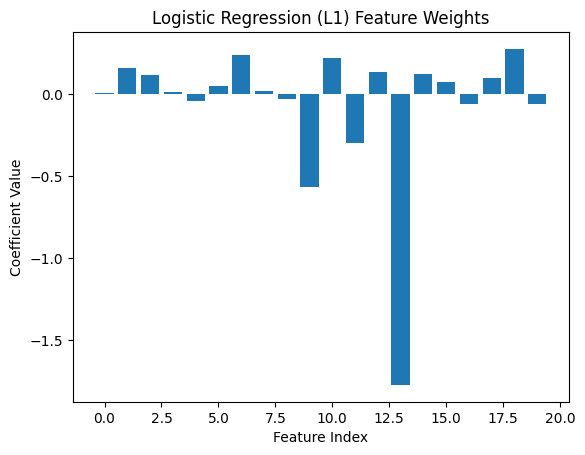

In [2]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=5, n_redundant=5, 
    n_classes=2, random_state=42
)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Train Logistic Regression with L1 penalty (Lasso)
model = LogisticRegression(penalty='l1', solver='liblinear', C=1000)
model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Display non-zero coefficients to check feature selection
coefficients = model.coef_.flatten()
print(coefficients)
num_selected_features = np.sum(coefficients != 0)

print(f"Number of selected features: {num_selected_features}")
print(f"Non-zero coefficients: {coefficients[coefficients != 0]}")
print(f"intercept: {model.intercept_}")

# Plot feature coefficients
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Logistic Regression (L1) Feature Weights")
plt.show()


In [3]:
import src.measures as measure

model = LogRegCCD(verbose=True)
model.fit(X_train, y_train, lam_max=10, lam_count=10)

# Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

model.validate(X_test, y_test, measure=measure.AUCROC())
model.validate(X_test, y_test, measure=measure.FMeasure())


LogRegCCD:  Number of features: 20
LogRegCCD:  Lambdas space: [1.00000000e+01 2.78255940e+00 7.74263683e-01 2.15443469e-01
 5.99484250e-02 1.66810054e-02 4.64158883e-03 1.29154967e-03
 3.59381366e-04 1.00000000e-04]
LogRegCCD:  Fold 1
LogRegCCD:  Train shape: (720, 20)
LogRegCCD:  Validation shape: (80, 20)
LogRegCCD:  Lambda 10.0: Fold 1 Validation Loss = 0.2500 Beta: [-6.94444444e-05 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00]
LogRegCCD:  Lambda 2.782559402207126: Fold 1 Validation Loss = 0.2500 Beta: [-6.94444445e-05 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+